


----------------binary inverted Image--------------------


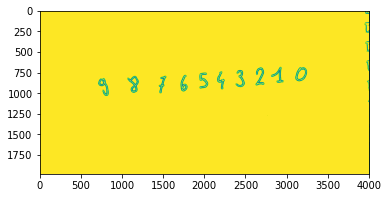




----------------threshed Image--------------------


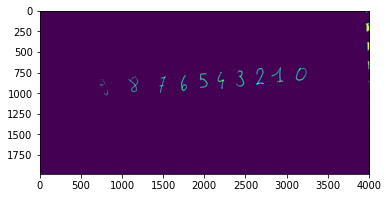




----------------Contoured Image--------------------


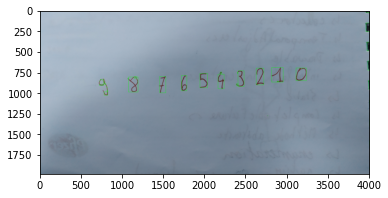

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#reading the image and copying a gray version
image = cv2.imread('/home/romain/Bureau/test/exemple_simple.jpg')
grey = cv2.cvtColor(image.copy(),cv2.COLOR_BGR2GRAY)


#Creating a inversed binary image out of the gray one.
ret, thresh = cv2.threshold(grey.copy(),75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

bw = cv2.adaptiveThreshold(grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, -10)
bw_inverted = cv2.bitwise_not(bw)

preprocessed_digits = []

#finding rectangular frames arround our digits
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
    
    
print("\n\n\n----------------binary inverted Image--------------------")
plt.imshow(bw_inverted)
plt.show()    
print("\n\n\n----------------threshed Image--------------------")
plt.imshow(thresh)
plt.show()
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)